In [8]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import sys
sys.path.append("..")
from dsvit.preprocessor import skull_strip, apply_clahe, gaussian_smooth

In [9]:
mat_files = sorted(glob("/Users/darshdave/Documents/BRAINTUMOR/DATASET/FILES/*.mat"))
classes = {1: 'Meningioma', 2: 'Pituitary', 3: 'Glioma'}

In [10]:
samples = []
shown = {1: 0, 2: 0, 3: 0}

for path in mat_files:
    with h5py.File(path, 'r') as f:
        if 'cjdata' not in f:
            continue
        group = f['cjdata']
        image = np.array(group['image']).T
        label = int(np.array(group['label'])[0][0])
        
        if shown[label] < 1:
            samples.append({'image': image, 'label': label, 'path': path})
            shown[label] += 1
    if len(samples) == 3:
        break

In [11]:
def visualize_preprocessing(sample):
    image = sample['image']
    label = sample['label']

    stripped = skull_strip(image)
    clahe_img = apply_clahe(stripped)
    smooth_img = gaussian_smooth(stripped)

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(f"Preprocessing Stages – {classes[label]}", fontsize=14)

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis('off')

    axes[1].imshow(stripped, cmap='gray')
    axes[1].set_title("Skull Stripped")
    axes[1].axis('off')

    axes[2].imshow(clahe_img, cmap='gray')
    axes[2].set_title("CLAHE Enhanced")
    axes[2].axis('off')

    axes[3].imshow(smooth_img, cmap='gray')
    axes[3].set_title("Gaussian Smoothed")
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

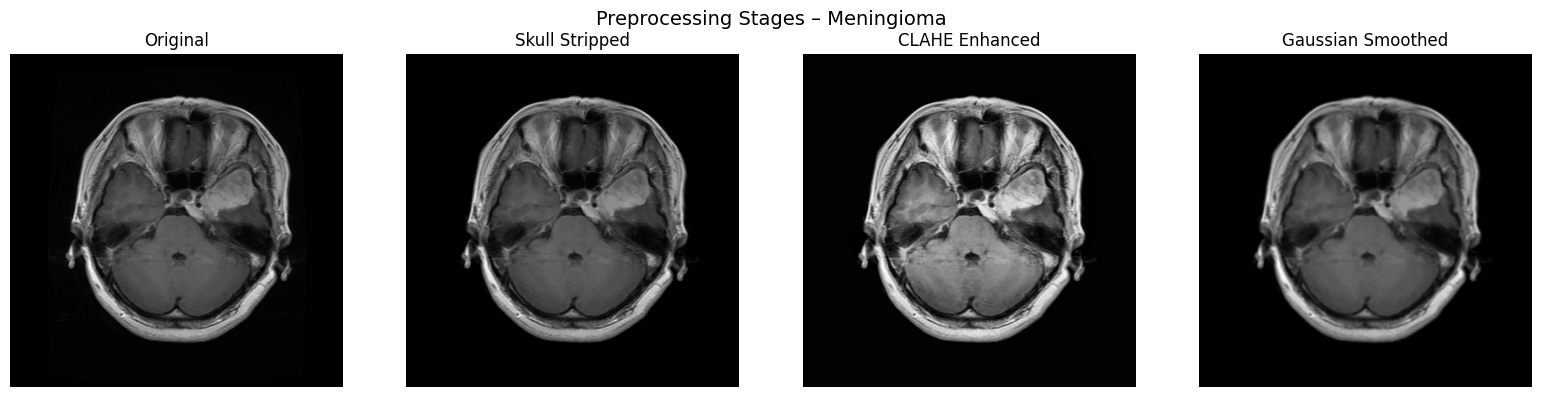

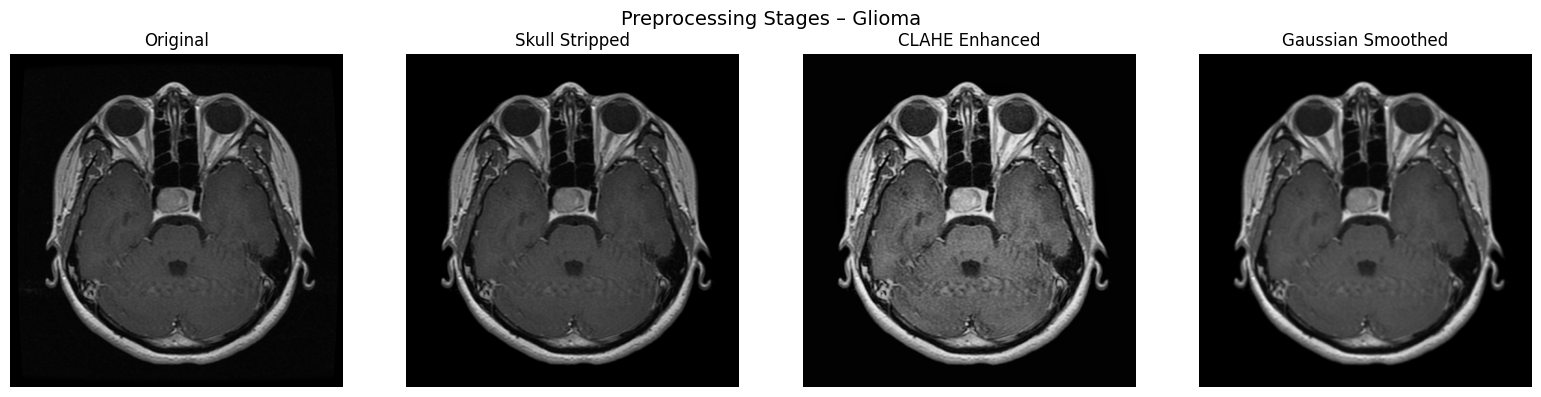

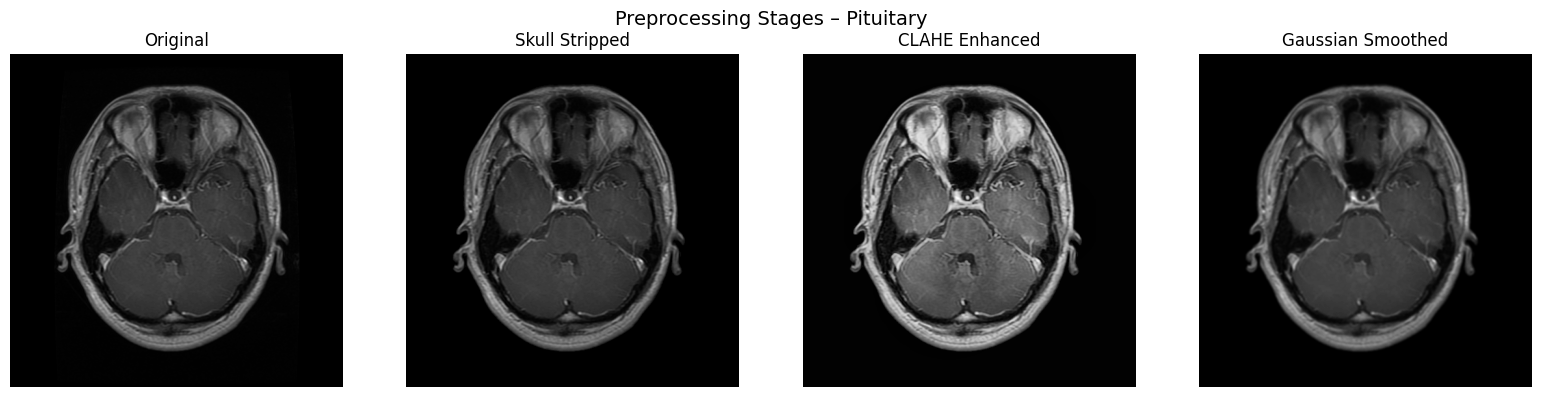

In [12]:
for s in samples:
    visualize_preprocessing(s)